In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [133]:
file = 'Otodom_3p'
df = pd.read_csv(file + '.csv')
df.shape

(117, 14)

In [134]:
df.dtypes

time_scraping              object
otodom_id                  object
price                      object
title                      object
surface_area               object
num_of_room               float64
floor                      object
form_of_property           object
finish_condition           object
balcony_garden_terrace    float64
parking_space              object
heating                    object
ad_link                    object
map_link                   object
dtype: object

In [135]:

# Generate random integers between 1 and 5 of the same length as the number of missing values in 'num_of_room'
random_values = np.random.randint(1, 6, size=df['num_of_room'].isnull().sum())

# Create a Series from the random values with the same index as the missing values in 'num_of_room'
random_values_series = pd.Series(random_values, index=df.loc[df['num_of_room'].isnull(), 'num_of_room'].index)

# Fill the missing values in 'num_of_room' with the random values
df['num_of_room'].fillna(random_values_series, inplace=True)

df['num_of_room'] = df['num_of_room'].astype(int)

In [136]:
# Define the list of choices
choices = ['Balkon', 'Taras', 'Garaz', 'Plwnica', 'Winda']

# Function to generate a string of random choices
def generate_random_choices(num_choices):
    return ', '.join(np.random.choice(choices, size=num_choices))

# Generate a string of random choices for each missing value in 'balcony_garden_terrace'
random_values = [generate_random_choices(np.random.randint(1, 4)) for _ in range(df['balcony_garden_terrace'].isnull().sum())]

# Create a Series from the random values with the same index as the missing values in 'balcony_garden_terrace'
random_values_series = pd.Series(random_values, index=df.loc[df['balcony_garden_terrace'].isnull(), 'balcony_garden_terrace'].index)

# Fill the missing values in 'balcony_garden_terrace' with the random values
df['balcony_garden_terrace'].fillna(random_values_series, inplace=True)

C:\Users\Purn\AppData\Local\Temp\ipykernel_12392\3445681054.py:15: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['Plwnica, Balkon, Balkon' 'Balkon, Winda, Taras'
 'Plwnica, Plwnica, Taras' 'Garaz' 'Taras' 'Balkon' 'Taras, Winda'
 'Plwnica, Plwnica, Taras' 'Plwnica, Plwnica' 'Garaz, Winda, Winda'
 'Garaz, Plwnica, Taras' 'Garaz, Garaz' 'Garaz' 'Winda, Balkon, Balkon'
 'Plwnica, Plwnica' 'Plwnica' 'Taras' 'Balkon, Taras'
 'Winda, Garaz, Garaz' 'Garaz' 'Winda, Garaz' 'Plwnica' 'Garaz' 'Plwnica'
 'Taras' 'Balkon' 'Balkon' 'Balkon, Plwnica, Taras' 'Taras' 'Garaz'
 'Winda' 'Plwnica' 'Garaz, Winda, Winda' 'Garaz' 'Taras'
 'Garaz, Taras, Winda' 'Garaz, Balkon' 'Garaz, Taras, Plwnica'
 'Taras, Winda, Balkon' 'Taras, Balkon, Winda' 'Balkon, Taras'
 'Winda, Balkon' 'Balkon' 'Plwnica' 'Plwnica, Plwnica, Garaz' 'Balkon'
 'Plwnica, Winda' 'Balkon, Balkon' 'Plwnica, Taras, Balkon'
 'Plwnica, Plwnica' 'Plwnica' 'Balkon, Plwnica'

In [137]:
df.isnull().sum()

time_scraping              0
otodom_id                  0
price                      0
title                      0
surface_area               0
num_of_room                0
floor                      4
form_of_property          21
finish_condition          13
balcony_garden_terrace     0
parking_space             48
heating                   26
ad_link                    0
map_link                   0
dtype: int64

In [138]:
# df['price'] = df['price'].str.replace('zł', '').str.replace(' ', '').str.replace(',', '.').astype(int) # error when 'ask' in price
df['price'] = pd.to_numeric(df['price'].str.replace('zł', '').str.replace(' ', ''), errors='coerce').astype('Int64')

In [139]:
df['surface_area'] = pd.to_numeric(df['surface_area'].str.replace(',', '.').str.replace('m²', '').str.replace(' ', ''), errors='coerce')

In [140]:
# Split the 'floor' column
df[['floor', 'num_floors_in_building']] = df['floor'].str.split('/', expand=True)

# Replace 'parter' with 0 in the 'floor' column
df['floor'] = df['floor'].replace('parter', '0').replace('> 10', '11')

# Convert 'floor' and 'num_floors_in_building' to numeric
df['floor'] = pd.to_numeric(df['floor'], errors='coerce').astype('Int16')
df['num_floors_in_building'] = pd.to_numeric(df['num_floors_in_building'], errors='coerce').astype('Int16')

In [141]:
df['num_of_room'] = df['num_of_room'].astype('Int16')

In [142]:
# Create a dictionary of Polish words and their English translations
translation_dict = {
    'spółdzielcze wł. prawo do lokalu': 'cooperative ownership right to the premises',
    'pełna własność': 'full ownership',

    'do zamieszkania': 'for living',
    'do wykończenia': 'for finishing',
    'do remontu': 'for renovation',

    'Winda': 'Elevator',
    'Plwnica': 'Laundry',
    'Balkon': 'Balcony',
    'Taras': 'Terrace',
    'Garaz': 'Garage',

    'garaż/miejsce parkingowe': 'garage/parking space',

    'miejskie': 'municipal',
    'gazowe': 'gas',
    'kotłownia': 'boiler room',
    'elektryczne': 'electric',
    'inne': 'other',
}

# Replace the Polish words with the English translations in the DataFrame
df.replace(translation_dict, inplace=True)

In [143]:
print('\nFORM-OF-PROPERTY')
print(df['form_of_property'].value_counts())
print('\nFINISH-CONDITION')
print(df['finish_condition'].value_counts())
print('\nBALCONY-GARDEN-TERRACE')
print(df['balcony_garden_terrace'].value_counts())


FORM-OF-PROPERTY
form_of_property
full ownership                                 91
cooperative ownership right to the premises     5
Name: count, dtype: int64

FINISH-CONDITION
finish_condition
for living        82
for finishing     16
for renovation     6
Name: count, dtype: int64

BALCONY-GARDEN-TERRACE
balcony_garden_terrace
Terrace                    12
Laundry                    10
Elevator                    8
Garage                      8
Balcony                     8
Plwnica, Plwnica            6
Plwnica, Plwnica, Taras     3
Taras, Balkon               3
Garaz, Plwnica              3
Winda, Winda, Garaz         2
Plwnica, Taras              2
Balkon, Plwnica             2
Balkon, Winda, Taras        2
Plwnica, Winda              2
Winda, Balkon               2
Garaz, Balkon               2
Taras, Taras                2
Garaz, Garaz                2
Winda, Garaz                2
Garaz, Winda, Winda         2
Balkon, Taras               2
Plwnica, Winda, Balkon      1
Balkon, 

In [144]:
print('\nPARKING-SPACE')
print(df['parking_space'].value_counts())
print('\nHEATING')
print(df['heating'].value_counts())


PARKING-SPACE
parking_space
garage/parking space    69
Name: count, dtype: int64

HEATING
heating
municipal      76
gas            10
boiler room     2
electric        2
other           1
Name: count, dtype: int64


In [145]:
# Step 2: Split the 'balcony_garden_terrace' column values into lists
df['balcony_garden_terrace'] = df['balcony_garden_terrace'].str.split(',')

# Step 3: Apply the translation to each item in the list
df['balcony_garden_terrace'] = df['balcony_garden_terrace'].apply(
    lambda lst: list(set([translation_dict.get(item.strip(), item.strip()) for item in lst]))
    )

# Step 4: Join the translated items back into a comma-separated string
df['balcony_garden_terrace'] = df['balcony_garden_terrace'].apply(', '.join)

In [146]:
# Extract the latitude and longitude from the 'map_link' column
df[['latitude', 'longitude']] = df['map_link'].str.extract('@(.*?),(.*?),', expand=True)

# Convert 'latitude' and 'longitude' to numeric
df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')
df['longitude'] = pd.to_numeric(df['longitude'], errors='coerce')

In [147]:
df.head(5)

,time_scraping,otodom_id,price,title,surface_area,num_of_room,floor,form_of_property,finish_condition,balcony_garden_terrace,parking_space,heating,ad_link,map_link,num_floors_in_building,latitude,longitude
0,2024-06-06 01:31:51,2-pokojowe-mieszkanie-35m2-loggia-bezposrednio...,<NA>,2-pokojowe mieszkanie 35m2 + loggia Bezpośrednio,35.41,5,3,full ownership,for finishing,"Balcony, Laundry",garage/parking space,NaN,https://www.otodom.pl/pl/oferta/2-pokojowe-mie...,"https://www.google.com/maps/@52.172792,20.9941...",8,52.172792,20.994102
1,2024-06-06 01:31:56,bezposr-2pok-metro-wilanowska-cena-do-negocjac...,970000,Bezpośr. 2pok. Metro Wilanowska CENA DO NEGOCJ...,48.55,4,7,full ownership,for living,"Terrace, Elevator, Balcony",garage/parking space,municipal,https://www.otodom.pl/pl/oferta/bezposr-2pok-m...,"https://www.google.com/maps/@52.1823249,21.025...",15,52.182325,21.025885
2,2024-06-06 01:32:01,2-pokoje-ul-lindego-metro-wawrzyszew-ID4qUHs,629000,"2 pokoje, ul. Lindego, Metro Wawrzyszew",36.50,5,0,full ownership,for living,"Terrace, Laundry",NaN,municipal,https://www.otodom.pl/pl/oferta/2-pokoje-ul-li...,"https://www.google.com/maps/@52.2869133,20.940...",10,52.286913,20.940933
3,2024-06-06 01:32:08,piekne-ciche-100m-w-kamienicy-powisle-metro-80...,2480000,"Piękne, ciche 100m w kamienicy. Powiśle metro ...",99.69,5,3,cooperative ownership right to the premises,for living,Garage,NaN,municipal,https://www.otodom.pl/pl/oferta/piekne-ciche-1...,"https://www.google.com/maps/@52.23805,21.02935...",4,52.238050,21.029350
4,2024-06-06 01:32:12,niski-czynsz-ip-winda-ID4qWEi,560000,Niski Czynsz // Ip. // Winda,50.00,5,1,NaN,NaN,Terrace,garage/parking space,NaN,https://www.otodom.pl/pl/oferta/niski-czynsz-i...,"https://www.google.com/maps/@52.4465078,20.692...",5,52.446508,20.692522


In [148]:
df.sample(5)

,time_scraping,otodom_id,price,title,surface_area,num_of_room,floor,form_of_property,finish_condition,balcony_garden_terrace,parking_space,heating,ad_link,map_link,num_floors_in_building,latitude,longitude
90,2024-06-06 01:39:09,5-pokojowe-mieszkanie-kabaty-ursynow-ID4qlcW,2900000,5-pokojowe mieszkanie Kabaty Ursynów,157.00,2,1,full ownership,for living,Elevator,garage/parking space,gas,https://www.otodom.pl/pl/oferta/5-pokojowe-mie...,"https://www.google.com/maps/@52.1334105,21.048...",2,52.133410,21.048416
48,2024-06-06 01:35:43,kup-i-zarabiaj-gotowy-lokal-w-pelni-wyposazony...,450000,"Kup i zarabiaj! Gotowy lokal, w pełni wyposażony.",18.00,1,4,full ownership,for living,"Terrace, Balcony, Laundry",NaN,municipal,https://www.otodom.pl/pl/oferta/kup-i-zarabiaj...,"https://www.google.com/maps/@52.2279436,20.958...",27,52.227944,20.958622
38,2024-06-06 01:34:51,waraszaw-rembertow-piekne-3pok-poddasze101m2-I...,1450000,Waraszaw-Rembertów/Piękne 3pok.+poddasze=101m2,101.36,4,1,full ownership,for living,"Terrace, Elevator, Balcony",garage/parking space,gas,https://www.otodom.pl/pl/oferta/waraszaw-rembe...,"https://www.google.com/maps/@52.2715718,21.158...",2,52.271572,21.158728
61,2024-06-06 01:36:45,bezposrednio-38m2-2-pokoje-mieszkanie-50m-metr...,569000,"Bezpośrednio, 38m2 2 pokoje mieszkanie, 50m Metro",38.00,3,10,cooperative ownership right to the premises,for finishing,Terrace,garage/parking space,municipal,https://www.otodom.pl/pl/oferta/bezposrednio-3...,"https://www.google.com/maps/@52.2938341,21.031...",<NA>,52.293834,21.031681
115,2024-06-06 01:41:11,niewielki-apartament-w-kamienicy-2-pok-ID4oHlJ,1224000,Niewielki apartament w kamienicy |2 pok.,44.63,3,0,full ownership,for living,Elevator,NaN,municipal,https://www.otodom.pl/pl/oferta/niewielki-apar...,"https://www.google.com/maps/@52.19696,21.02195...",4,52.196960,21.021950


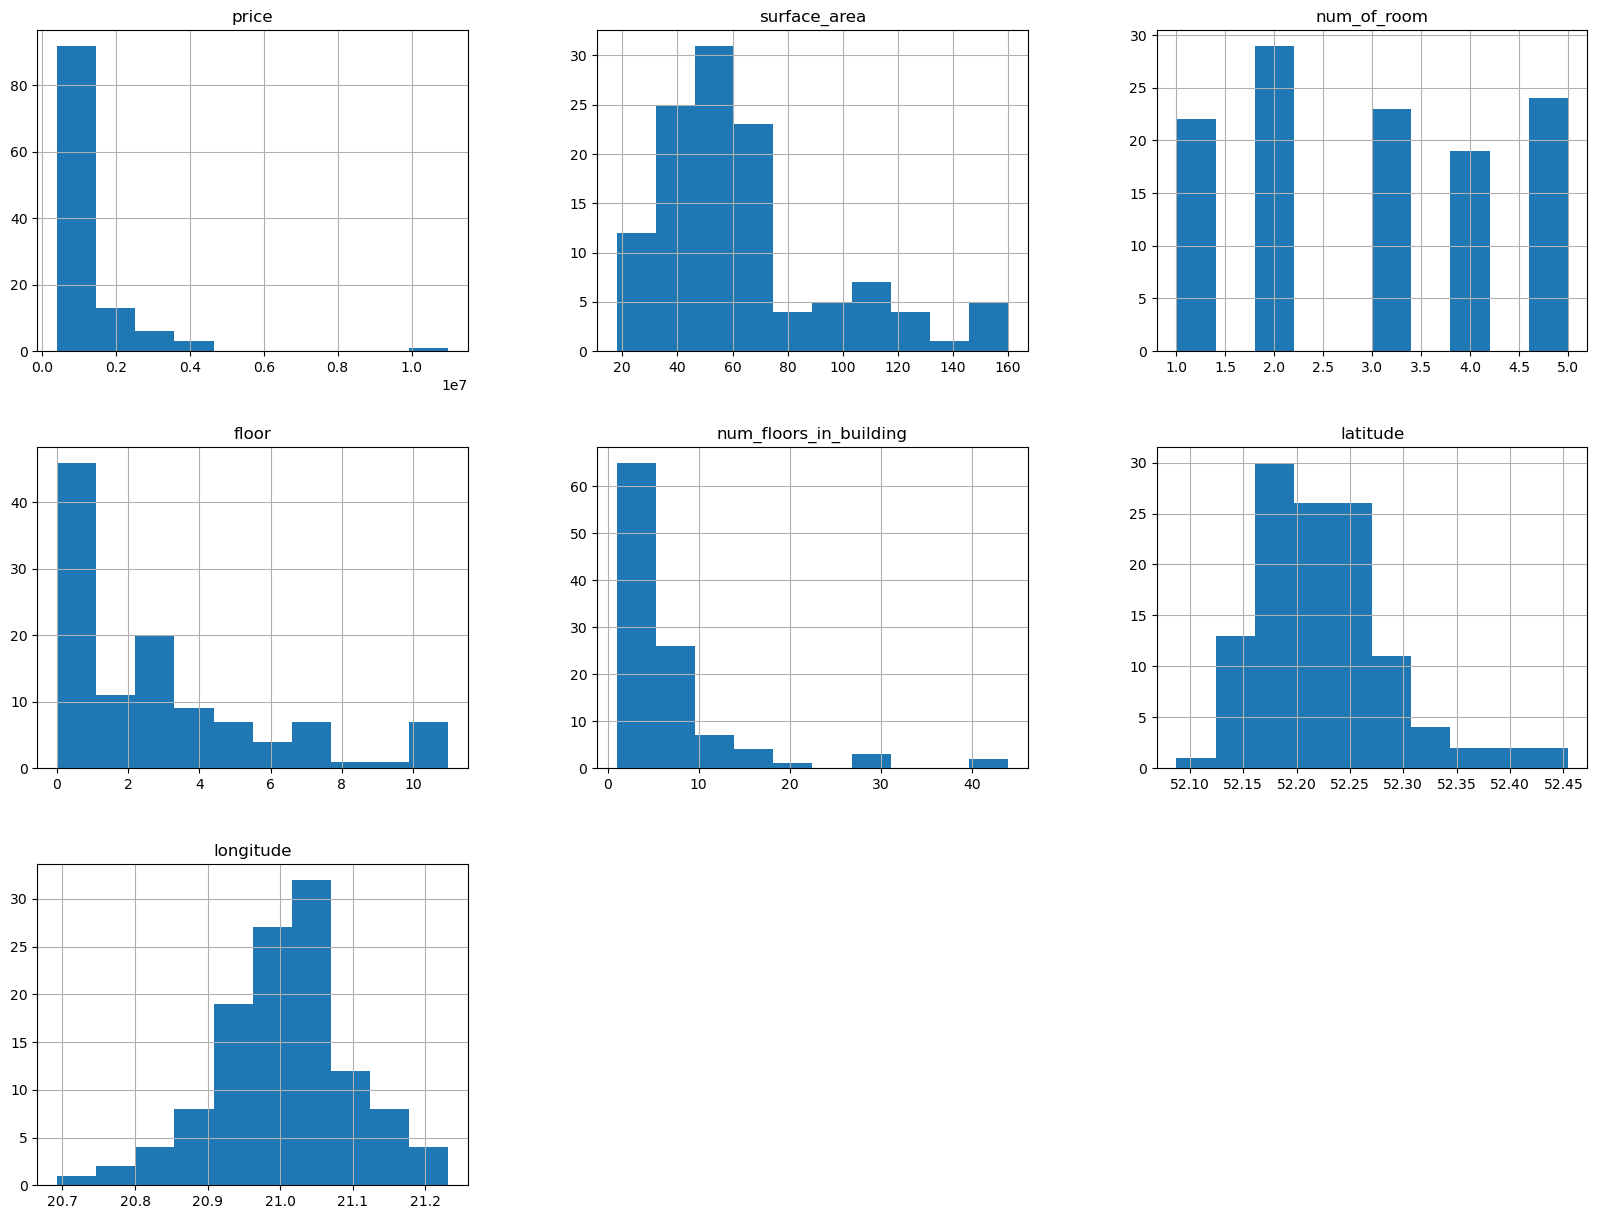

In [149]:
import matplotlib.ticker as ticker

ax = df.hist(figsize=(20,15))

# for sub_ax in ax.flatten():
#     sub_ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))

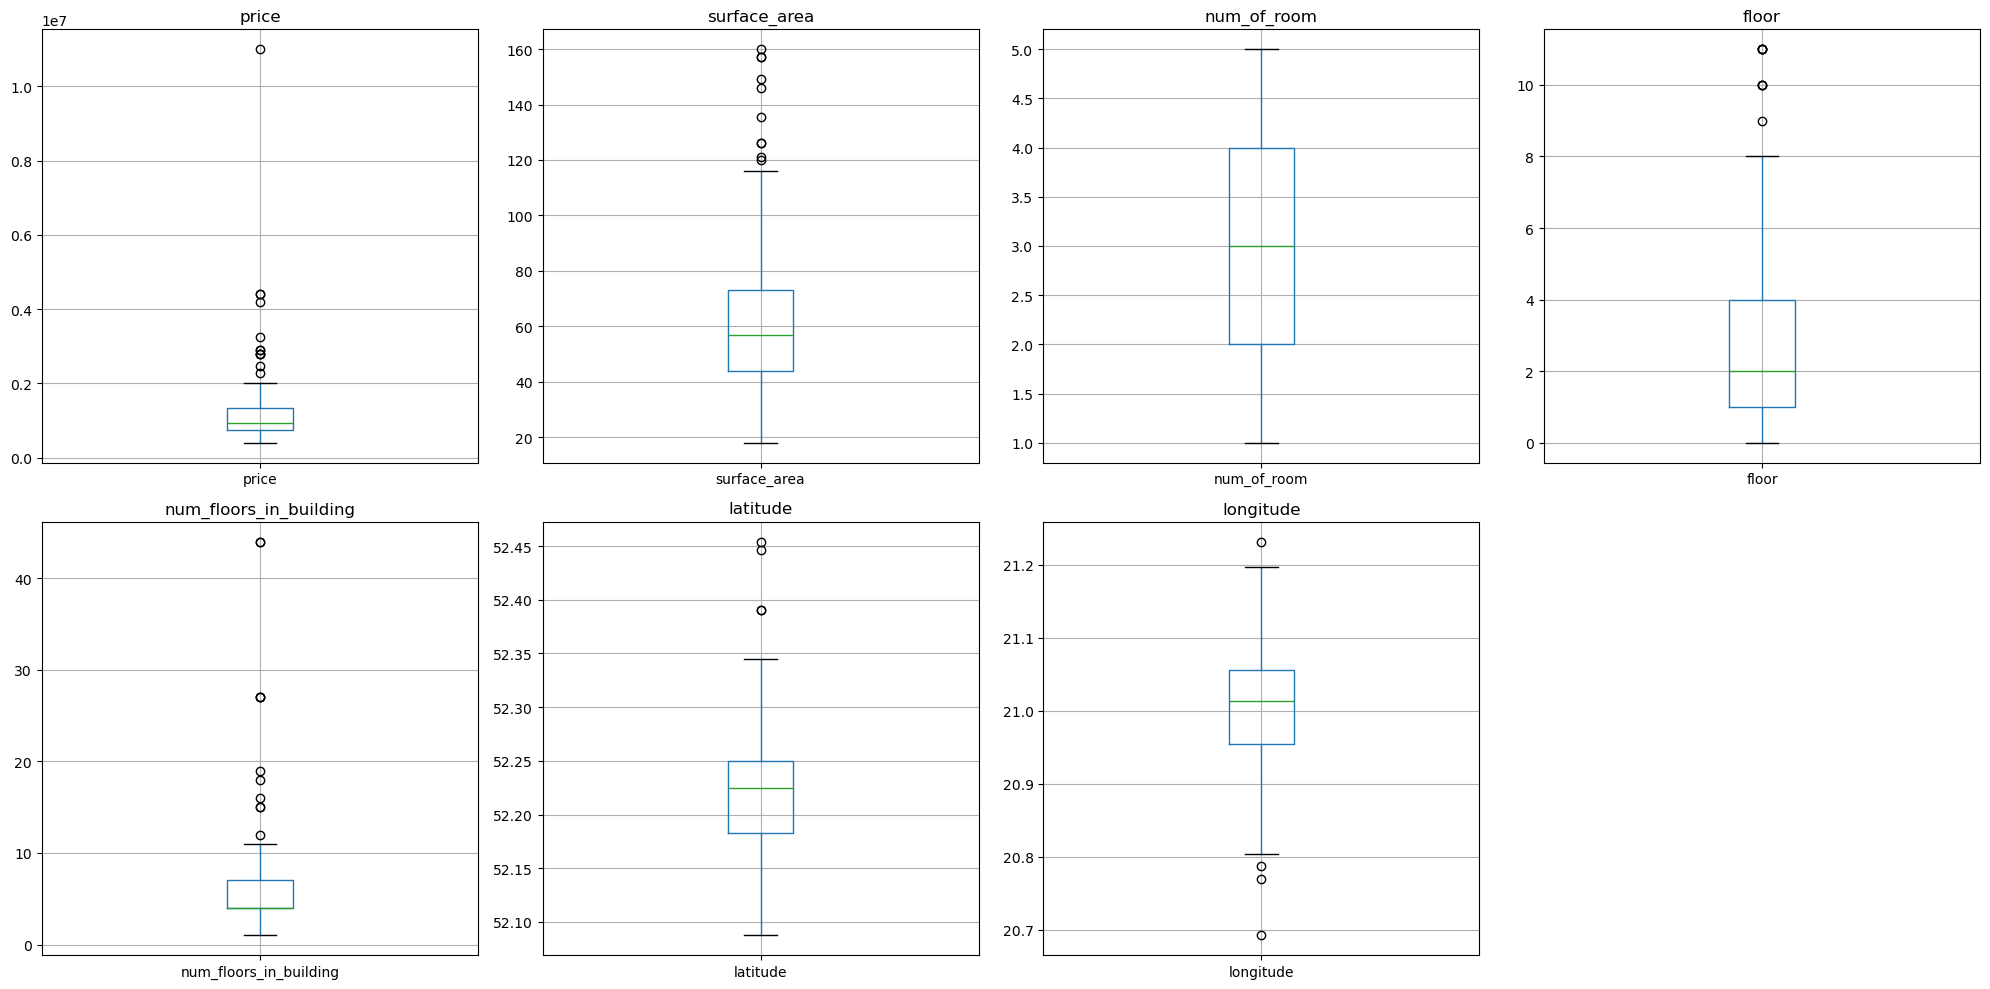

In [150]:
# Select numerical columns
numerical_cols = df.select_dtypes(include=[np.number])

# Number of columns and rows for the subplot grid
num_cols = 4
num_rows = int(np.ceil(len(numerical_cols.columns) / num_cols))

# Create a figure and axes with a subplot for each column
fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, num_rows*5))

# Loop over the columns and create a boxplot for each one
for i, col in enumerate(numerical_cols.columns):
    ax = axs[i//num_cols, i%num_cols]
    numerical_cols[[col]].boxplot(ax=ax)
    ax.set_title(col)

# Remove empty subplots
if len(numerical_cols.columns) % num_cols != 0:
    for ax in axs.flatten()[len(numerical_cols.columns):]:
        ax.remove()

# Show the plot
plt.tight_layout()
plt.show()

In [151]:
df = df.drop(['time_scraping', 'otodom_id', 'title', 'ad_link', 'map_link'], axis=1)

In [152]:
df.head(5)

,price,surface_area,num_of_room,floor,form_of_property,finish_condition,balcony_garden_terrace,parking_space,heating,num_floors_in_building,latitude,longitude
0,<NA>,35.41,5,3,full ownership,for finishing,"Balcony, Laundry",garage/parking space,NaN,8,52.172792,20.994102
1,970000,48.55,4,7,full ownership,for living,"Terrace, Elevator, Balcony",garage/parking space,municipal,15,52.182325,21.025885
2,629000,36.50,5,0,full ownership,for living,"Terrace, Laundry",NaN,municipal,10,52.286913,20.940933
3,2480000,99.69,5,3,cooperative ownership right to the premises,for living,Garage,NaN,municipal,4,52.238050,21.029350
4,560000,50.00,5,1,NaN,NaN,Terrace,garage/parking space,NaN,5,52.446508,20.692522


In [153]:
new_columns_order = ['price', 'latitude', 'longitude', 'surface_area', 'num_of_room', 'floor', 'num_floors_in_building', 'finish_condition', 'form_of_property', 'balcony_garden_terrace', 'parking_space',	'heating']
df = df[new_columns_order]

In [154]:
# df.to_csv(file + '_cleaned.csv', index=False)

In [155]:
df = df[df['price'].notna()]
df.head(5)

,price,latitude,longitude,surface_area,num_of_room,floor,num_floors_in_building,finish_condition,form_of_property,balcony_garden_terrace,parking_space,heating
1,970000,52.182325,21.025885,48.55,4,7,15,for living,full ownership,"Terrace, Elevator, Balcony",garage/parking space,municipal
2,629000,52.286913,20.940933,36.50,5,0,10,for living,full ownership,"Terrace, Laundry",NaN,municipal
3,2480000,52.238050,21.029350,99.69,5,3,4,for living,cooperative ownership right to the premises,Garage,NaN,municipal
4,560000,52.446508,20.692522,50.00,5,1,5,NaN,NaN,Terrace,garage/parking space,NaN
5,819000,52.201297,20.889940,60.00,5,1,7,NaN,full ownership,Balcony,garage/parking space,municipal


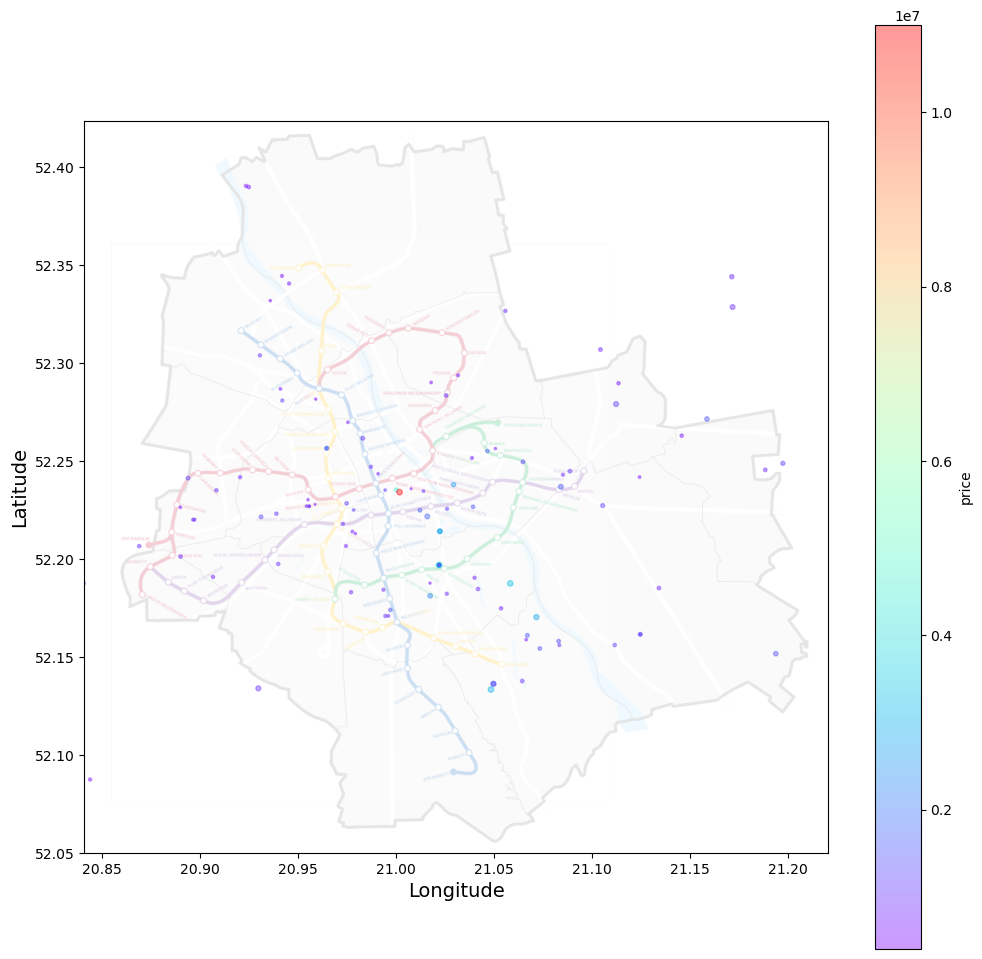

In [156]:
from PIL import Image

warsaw_metro_2050_image_url = r'C:\Users\Purn\Documents\GitHub\Otodom_Scrapper_Analysis\Warszawa_metra_2050.png'

image = np.array(Image.open(warsaw_metro_2050_image_url))

# plot the populations with density and colors
ax = df.plot(kind = "scatter",
            x = "longitude",
            y = "latitude",
            alpha = 0.4,
            s = df["surface_area"]/10,
            figsize = (12,12),
            c = "price", cmap = plt.get_cmap("rainbow"),
            colorbar = True,
            sharex = True)

# Adjust the cali_image's x and y axis according to the longitutes and latitudes of the df.
# plt.imshow(image, extent=[20.840682, 21.220630, 52.109328, 52.353667], alpha=0.4) # works, but horizontal, original estimated coordinates
plt.imshow(image, extent=[20.840682, 21.220630, 52.05, 52.423667], alpha=0.2) # coordinates are adjustable
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

# prices = df["price"]
# tick_values = np.linspace(prices.min(), prices.max(), 11)
# cbar = plt.colorbar(cmap = "rainbow")
# cbar.ax.set_yticklabels(["zł %dk"%(round(v/1000)) for v in tick_values], fontsize=14)
# cbar.set_label('House Price', fontsize=16)

plt.show()

In [157]:
import statsmodels.api as sm

df_ = df[['price', 'surface_area', 'num_of_room', 'floor', 'num_floors_in_building']].dropna().astype(float)
X = df_.drop(['price'], axis=1)
y = df_[['price']]
print(X.dtypes)
print(y.dtypes)
print(X.shape)
print(y.shape)

surface_area              float64
num_of_room               float64
floor                     float64
num_floors_in_building    float64
dtype: object
price    float64
dtype: object
(106, 4)
(106, 1)


In [162]:
X = sm.add_constant(np.asarray(X))
y = np.asarray(y)
OLS_model = sm.OLS(y, X).fit()

print(OLS_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     55.64
Date:                Sun, 09 Jun 2024   Prob (F-statistic):           1.05e-24
Time:                        05:02:09   Log-Likelihood:                -1574.8
No. Observations:                 106   AIC:                             3160.
Df Residuals:                     101   BIC:                             3173.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9.774e+05   2.24e+05     -4.361      0.0

In [164]:
import plotly.express as px
px.imshow(df_.corr())